# Waiter's Tips  Price Prediction

In [27]:
import pandas as pd
import seaborn as sns

In [28]:
df=pd.read_csv('tips.csv')

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [31]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
df['Gender']=df['sex']

In [42]:
df

,total_bill,tip,smoker,day,time,size,Gender
0,16.99,1.01,No,Sun,Dinner,2,Female
1,10.34,1.66,No,Sun,Dinner,3,Male
2,21.01,3.50,No,Sun,Dinner,3,Male
3,23.68,3.31,No,Sun,Dinner,2,Male
4,24.59,3.61,No,Sun,Dinner,4,Female
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,Male
240,27.18,2.00,Yes,Sat,Dinner,2,Female
241,22.67,2.00,Yes,Sat,Dinner,2,Male
242,17.82,1.75,No,Sat,Dinner,2,Male


In [33]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

## Swarm

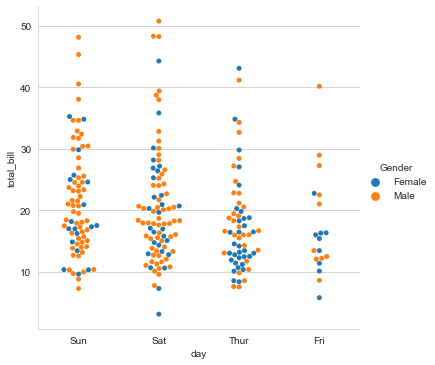

In [47]:
sns.catplot(data=df,x='day',y='total_bill',kind='swarm',hue='Gender')

## Jointplot

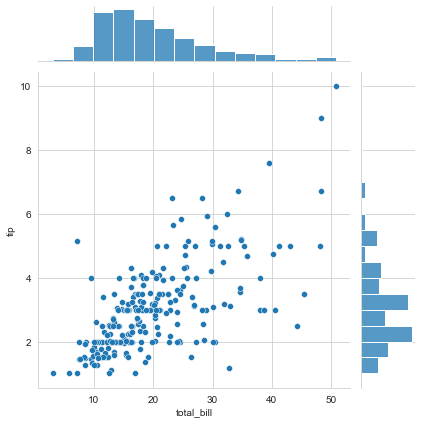

In [49]:
sns.jointplot(data=df,x='total_bill',y='tip')

## Countplot

<AxesSubplot:xlabel='Gender', ylabel='count'>

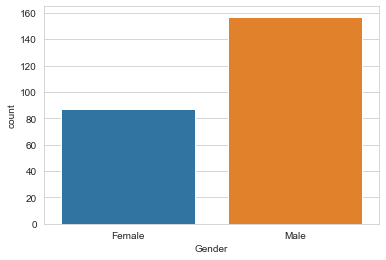

In [43]:
sns.countplot(data=df,x='Gender')

## Barplot

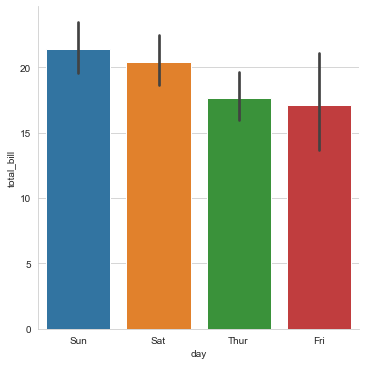

In [37]:
sns.catplot(data=df,x='day',y='total_bill',kind='bar')

In [55]:
df['Gender'].replace(['Female','Male'],[0,1],inplace=True)
df['smoker'].replace(['No','Yes'],[0,1],inplace=True)
df['time'].replace(['Dinner','Lunch'],[1,0],inplace=True)
df['day'].replace(['Thur','Fri','Sat','Sun'],[0,1,2,3],inplace=True)


In [56]:
df

,total_bill,tip,smoker,day,time,size,Gender
0,16.99,1.01,0,3,1,2,0
1,10.34,1.66,0,3,1,3,1
2,21.01,3.50,0,3,1,3,1
3,23.68,3.31,0,3,1,2,1
4,24.59,3.61,0,3,1,4,0
...,...,...,...,...,...,...,...
239,29.03,5.92,0,2,1,3,1
240,27.18,2.00,1,2,1,2,0
241,22.67,2.00,1,2,1,2,1
242,17.82,1.75,0,2,1,2,1


In [57]:
 from sklearn.model_selection import train_test_split

In [58]:
x=df.drop(columns=['tip','smoker'],axis=1)
y=df['tip']

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## LinearRegression

In [60]:
from sklearn.linear_model import LinearRegression

In [62]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([2.7990133 , 3.06722828, 2.78183089, 1.52307685, 2.65289947,
       1.57433898, 2.6185536 , 3.10899621, 2.89841456, 4.49060325,
       3.26779574, 3.23965651, 2.32005067, 2.34478337, 2.38790618,
       4.12850621, 1.94860661, 2.28457233, 2.65497151, 3.29797584,
       3.8614486 , 2.89632678, 2.578206  , 2.40269399, 2.36605973,
       2.63446099, 2.28055506, 4.61043353, 3.69313778, 2.45755037,
       2.3689431 , 2.30047973, 2.43506972, 2.01621799, 2.67959172,
       2.28429042, 2.76495703, 2.11730123, 5.62661533, 2.83676714,
       1.76696609, 2.29621976, 2.63713462, 4.31239734, 2.20110047,
       2.79787939, 2.64581737, 2.95989743, 2.77688493])

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mse_lr=mean_squared_error(y_test,y_pred)
mse_lr

0.8380233390547828

## Random Forest regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)

In [77]:
mse_rf=mean_squared_error(y_predrf,y_test)
mse_rf

1.0234637789795917

## Support Vector Machine

In [73]:
from sklearn.svm import SVR

In [74]:
svm=SVR()
svm.fit(x_train,y_train)
y_pred_svr=svm.predict(x_test)
y_pred_svr

array([2.68424115, 2.81037947, 2.91077931, 1.53808757, 2.50752745,
       1.43454624, 2.70137725, 3.3501761 , 2.79679775, 4.35738958,
       3.57808788, 3.54697748, 2.21646424, 2.07567756, 2.10867662,
       4.08790061, 1.59546512, 2.18829204, 2.83063352, 3.37383957,
       4.0232909 , 3.10678079, 2.43922888, 2.33983891, 2.11336411,
       2.51926444, 1.95573494, 4.28198884, 3.6543594 , 2.44485795,
       2.30878883, 2.0125131 , 2.38880605, 1.81577472, 2.75994584,
       2.15861512, 2.62178169, 1.77387572, 4.8618175 , 2.48958255,
       1.60119842, 2.00653571, 2.42707631, 4.13481949, 2.060939  ,
       2.64054375, 2.74316252, 3.15953178, 2.64074756])

In [78]:
mse_svr=mean_squared_error(y_pred_svr,y_test)
mse_svr

0.8965757368810738

In [80]:
print('Linear_Regression :',mse_lr)
print('Random_Forest     :',mse_rf)
print('SVM               :',mse_svr)

Linear_Regression : 0.8380233390547828
Random_Forest     : 1.0234637789795917
SVM               : 0.8965757368810738


In [97]:
import pickle

In [98]:
pickle.dump((model),open('model_lr.pkl','wb'))
model.lr=pickle.load(open('model_lr.pkl','rb'))